In [1]:
# Replica del Modelo de Difusión "*Palette: Image-to-Image Diffusion Models*"
## Alumno: Patrick Xavier Marquez Choque
## Curso: Proyecto Final de Carrera III
## Periodo: 2024-I

In [1]:
######
#@title 1. Configuración del Entorno del Modelo de Difusión
######

!nvidia-smi --query-gpu=gpu_name,driver_version,memory.total --format=csv

name, driver_version, memory.total [MiB]
Tesla T4, 535.104.05, 15360 MiB


In [2]:
######
#@title 2. Clonar Repositorio
######

%cd /content/
!git clone https://github.com/Janspiry/Palette-Image-to-Image-Diffusion-Models

/content
Cloning into 'Palette-Image-to-Image-Diffusion-Models'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 317 (delta 115), reused 101 (delta 101), pack-reused 171
Receiving objects: 100% (317/317), 6.87 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (176/176), done.


In [3]:
######
#@title 3. Preparar el Modelo Pre-entrenado
######

#https://drive.google.com/file/d/1UYSFscugYN8msv7dQjIliWdQbd29h0HR/view?usp=sharing
#https://drive.google.com/file/d/1-X9jx3AzMdJg4lfIrWGoysTYZ1oN0OcK/view?usp=sharing

%cd /content/Palette-Image-to-Image-Diffusion-Models/
!gdown --id 1-X9jx3AzMdJg4lfIrWGoysTYZ1oN0OcK

/content/Palette-Image-to-Image-Diffusion-Models
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-X9jx3AzMdJg4lfIrWGoysTYZ1oN0OcK
From (redirected): https://drive.google.com/uc?id=1-X9jx3AzMdJg4lfIrWGoysTYZ1oN0OcK&confirm=t&uuid=ee7e50ff-d344-4763-b637-bcb79b2479a6
To: /content/Palette-Image-to-Image-Diffusion-Models/200_Network.pth
100% 251M/251M [00:03<00:00, 82.6MB/s]


In [4]:
%cd /content/Palette-Image-to-Image-Diffusion-Models/config/

/content/Palette-Image-to-Image-Diffusion-Models/config


In [5]:
######
#@title 4. Ingreso de los Hiper-parámetros del Modelo
######

%%writefile inpainting_celebahq.patch
--- a/config/inpainting_celebahq.json
+++ b/config/inpainting_celebahq.json
@@ -10,7 +10,7 @@
         "tb_logger": "tb_logger", // path of tensorboard logger
         "results": "results",
         "checkpoint": "checkpoint",
-        "resume_state": "experiments/train_inpainting_celebahq_220426_233652/checkpoint/190"
+        "resume_state": "200"
         // "resume_state": null // ex: 100, loading .state  and .pth from given epoch and iteration
     },

@@ -48,7 +48,7 @@
             "which_dataset": {
                 "name": "InpaintDataset", // import Dataset() class / function(not recommend) from default file
                 "args":{
-                    "data_root": "datasets/celebahq/flist/test.flist",
+                    "data_root": "input",
                     "mask_config": {
                         "mask_mode": "center"
                     }
@@ -56,8 +56,8 @@
             },
             "dataloader":{
                 "args":{
-                    "batch_size": 8,
-                    "num_workers": 4,
+                    "batch_size": 1,
+                    "num_workers": 1,
                     "pin_memory": true
                 }
             }
--

Writing inpainting_celebahq.patch


In [6]:
######
#@title 5. Parcheando el Modelo
######

!apt-get install dos2unix
!dos2unix inpainting_celebahq.json
!patch < inpainting_celebahq.patch

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  dos2unix
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 384 kB of archives.
After this operation, 1,367 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dos2unix amd64 7.4.2-2 [384 kB]
Fetched 384 kB in 1s (344 kB/s)
Selecting previously unselected package dos2unix.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../dos2unix_7.4.2-2_amd64.deb ...
Unpacking dos2unix (7.4.2-2) ...
Setting up dos2unix (7.4.2-2) ...
Processing triggers for man-db (2.10.2-1) ...
dos2unix: converting file inpainting_celebahq.json to Unix format...
patching file inpainting_celebahq.json


In [7]:
######
#@title 6. Subir imagen para el experimento
######

%cd /content/Palette-Image-to-Image-Diffusion-Models/
!mkdir -p input
%cd /content/Palette-Image-to-Image-Diffusion-Models/input/
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  savefile = open(fn, 'wb')
  savefile.write(uploaded[fn])
  print('Successfully uploaded "{}" ({} bytes).'.format(fn, len(uploaded[fn])))
  savefile.close()

/content/Palette-Image-to-Image-Diffusion-Models
/content/Palette-Image-to-Image-Diffusion-Models/input


Saving 100.jpg to 100.jpg
Successfully uploaded "100.jpg" (32796 bytes).


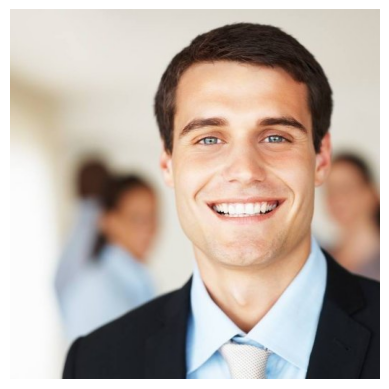

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for fn in uploaded.keys():
  img = mpimg.imread(fn)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [15]:
######
#@title 6. Subir imagen para el experimento
######

%cd /content/Palette-Image-to-Image-Diffusion-Models/
!python run.py -c config/inpainting_celebahq.json -p test

/content/Palette-Image-to-Image-Diffusion-Models
export CUDA_VISIBLE_DEVICES=0
/content/Palette-Image-to-Image-Diffusion-Models/run.py:28: UserWarning: You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True
  warnings.warn('You have chosen to use cudnn for accleration. torch.backends.cudnn.enabled=True')
2024-05-15 02:48:31.709679: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-15 02:48:31.709730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-15 02:48:31.711094: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-15 02:48:32.795800: W tens